In [1]:
import pandas as pd
data = pd.read_csv('fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


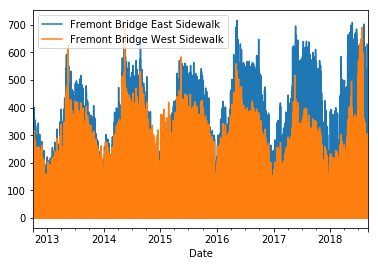

In [2]:
%matplotlib inline
data.plot()

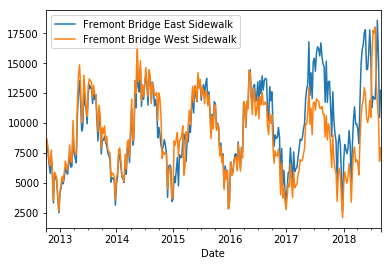

In [3]:
#Weekly
data.resample('W').sum().plot()

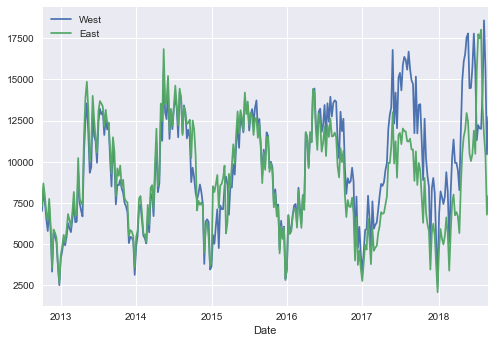

In [4]:
#Seaborn Style
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['West', 'East']

data.resample('W').sum().plot()

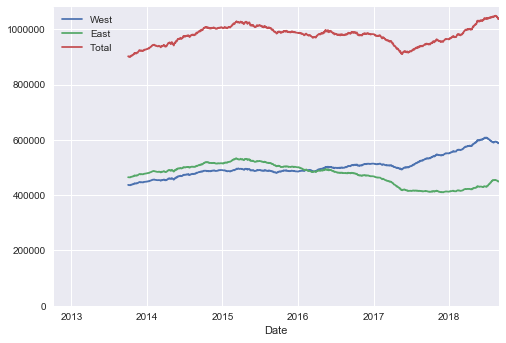

In [5]:
#Rolling daily sum
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

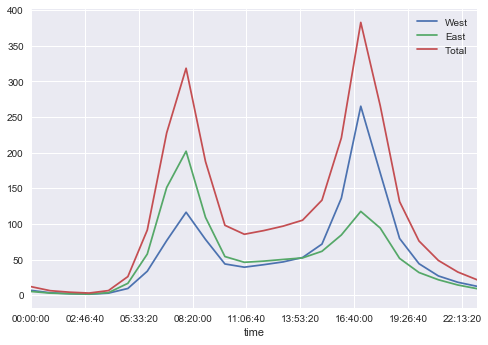

In [6]:
#Avg crossings each time of day
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


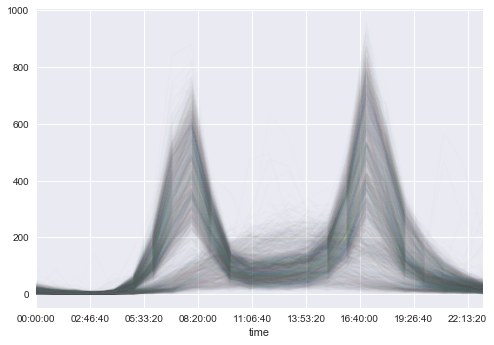

In [8]:
pivoted.plot(legend=False, alpha=0.01)